In [330]:
#Importing the necessary Libraries
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc , recall_score, precision_score , accuracy_score ,f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [334]:
#reading the clean data
df = pd.read_csv('final_df.csv',index_col=0)
df

,date,tournament,home_team,home_score,home_team.Rank,home_team_Avg. age,home_team.Total value,home_team.Points,home_Pl,home_Age,...,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK,goal_difference,match_result
0,2010-03-03,AFC Asian Cup qualification,Iran,1,21,28.1,74380000.0,1573,15.500000,27.600000,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
1,2013-10-15,AFC Asian Cup qualification,Iran,2,21,28.1,74380000.0,1573,15.500000,27.600000,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
2,2013-03-17,Friendly,Qatar,1,52,26.7,14430000.0,1438,21.666667,26.633333,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
3,2010-12-07,AFF Championship,Indonesia,2,160,23.3,5280000.0,1002,25.500000,23.100000,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
4,2016-12-14,AFF Championship,Indonesia,2,160,23.3,5280000.0,1002,25.500000,23.100000,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,2011-11-14,FIFA World Cup qualification,Bermuda,2,166,26.2,2830000.0,982,14.000000,25.100000,...,0.5,5.5,0.0,0.50,0.00,0.5,0.25,0.25,1,1
5207,2017-10-28,Friendly,Bermuda,2,166,26.2,2830000.0,982,14.000000,25.100000,...,0.5,5.5,0.0,0.50,0.00,0.5,0.25,0.25,1,2
5208,2010-10-02,CFU Caribbean Cup qualification,Puerto Rico,3,172,23.5,1500000.0,963,16.000000,23.000000,...,0.0,2.0,0.0,0.00,0.00,0.0,0.00,0.00,2,1
5209,2011-07-15,Friendly,Fiji,1,162,25.3,2780000.0,996,15.000000,25.900000,...,0.0,3.0,0.0,1.00,0.00,1.0,1.00,1.00,1,2


In [293]:
#check the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   5211 non-null   object 
 1   tournament             5211 non-null   object 
 2   home_team              5211 non-null   object 
 3   home_score             5211 non-null   int64  
 4   home_team.Rank         5211 non-null   int64  
 5   home_team_Avg. age     5211 non-null   float64
 6   home_team.Total value  5211 non-null   float64
 7   home_team.Points       5211 non-null   int64  
 8   home_Pl                5211 non-null   float64
 9   home_Age               5211 non-null   float64
 10  home_Poss              5211 non-null   float64
 11  home_MP                5211 non-null   float64
 12  home_Starts            5211 non-null   float64
 13  home_Min               5211 non-null   float64
 14  home_90s               5211 non-null   float64
 15  home

In [294]:
#rename column titles
df.rename(columns={'home_team_Avg. age':'home_team. age'},inplace=True)
df.rename(columns={'home_team':'home_team.name'},inplace=True)
df.rename(columns={'away_team':'away_team.name'},inplace=True)

In [335]:
#drop unnecessary columns as tournament, date and columns that had many null values as home_Poss, away_Poss,
# I imputed the null values with the average value but after training the model it is better to drop them.
df1 = df.drop(['tournament','goal_difference','home_score','away_score','date','home_Poss','away_Poss'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5211 entries, 0 to 5210
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   home_team              5211 non-null   object 
 1   home_team.Rank         5211 non-null   int64  
 2   home_team_Avg. age     5211 non-null   float64
 3   home_team.Total value  5211 non-null   float64
 4   home_team.Points       5211 non-null   int64  
 5   home_Pl                5211 non-null   float64
 6   home_Age               5211 non-null   float64
 7   home_MP                5211 non-null   float64
 8   home_Starts            5211 non-null   float64
 9   home_Min               5211 non-null   float64
 10  home_90s               5211 non-null   float64
 11  home_Gls               5211 non-null   float64
 12  home_Ast               5211 non-null   float64
 13  home_G-PK              5211 non-null   float64
 14  home_PK                5211 non-null   float64
 15  home

In [297]:
#checking the column names
df1.columns

Index(['home_team.name', 'home_team.Rank', 'home_team. age',
       'home_team.Total value', 'home_team.Points', 'home_Pl', 'home_Age',
       'home_MP', 'home_Starts', 'home_Min', 'home_90s', 'home_Gls',
       'home_Ast', 'home_G-PK', 'home_PK', 'home_PKatt', 'home_CrdY',
       'home_CrdR', 'home_Gls.1', 'home_Ast.1', 'home_G+A', 'home_G-PK.1',
       'home_G+A-PK', 'away_team.name', 'away_team.Rank', 'away_team. age',
       'away_team.Total value', 'away_team.Points', 'away_Pl', 'away_Age',
       'away_MP', 'away_Starts', 'away_Min', 'away_90s', 'away_Gls',
       'away_Ast', 'away_G-PK', 'away_PK', 'away_PKatt', 'away_CrdY',
       'away_CrdR', 'away_Gls.1', 'away_Ast.1', 'away_G+A', 'away_G-PK.1',
       'away_G+A-PK', 'match_result'],
      dtype='object')

In [298]:
#make 3 dataframes for home and away teams for later assigning data to each team name
home_team_df = df1[['home_team.name', 'home_team.Rank', 'home_team. age',
       'home_team.Total value', 'home_team.Points', 'home_Pl', 'home_Age',
        'home_MP', 'home_Starts', 'home_Min', 'home_90s',
       'home_Gls', 'home_Ast', 'home_G-PK', 'home_PK', 'home_PKatt',
       'home_CrdY', 'home_CrdR', 'home_Gls.1', 'home_Ast.1', 'home_G+A',
       'home_G-PK.1', 'home_G+A-PK']]

away_team_df = df1[['away_team.name', 'away_team.Rank',
       'away_team. age', 'away_team.Total value', 'away_team.Points',
       'away_Pl', 'away_Age', 'away_MP', 'away_Starts',
       'away_Min', 'away_90s', 'away_Gls', 'away_Ast', 'away_G-PK', 'away_PK',
       'away_PKatt', 'away_CrdY', 'away_CrdR', 'away_Gls.1', 'away_Ast.1',
       'away_G+A', 'away_G-PK.1', 'away_G+A-PK']]

#set index as team name
home_team_df = home_team_df.set_index(home_team_df['home_team.name']).drop('home_team.name',axis=1)
away_team_df = away_team_df.set_index(away_team_df['away_team.name']).drop('away_team.name',axis=1)

home_team_df.head()

,home_team.Rank,home_team. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_MP,home_Starts,home_Min,home_90s,...,home_G-PK,home_PK,home_PKatt,home_CrdY,home_CrdR,home_Gls.1,home_Ast.1,home_G+A,home_G-PK.1,home_G+A-PK
home_team.name,,,,,,,,,,,,,,,,,,,,,
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.5,0.5,5.500000,0.0,0.330,0.165000,0.500,0.165000,0.335
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.5,0.5,5.500000,0.0,0.330,0.165000,0.500,0.165000,0.335
Qatar,52,26.7,14430000.0,1438,21.666667,26.633333,5.333333,58.666667,480.0,5.333333,...,3.666667,1.0,1.0,10.333333,1.0,0.940,0.603333,1.540,0.633333,1.230
Indonesia,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,225.0,2.500000,...,4.000000,1.0,1.0,3.000000,0.0,2.085,0.500000,2.585,1.665000,2.165
Indonesia,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,225.0,2.500000,...,4.000000,1.0,1.0,3.000000,0.0,2.085,0.500000,2.585,1.665000,2.165


In [301]:
home_team_df.shape

(5211, 22)

#### Making the 2 similar dataframes, one with home team titles and one with the away team titles

In [302]:
cols = home_team_df.columns
cols2 = away_team_df.columns

In [303]:
away_team_df.columns=cols
df_2 = pd.concat([home_team_df, away_team_df], axis=0)
df_2.shape

(10422, 22)

In [304]:
away_team_df.columns=cols2
home_team_df.columns=cols2

df_3 = pd.concat([home_team_df, away_team_df], axis=0)
df_3.shape

(10422, 22)

In [305]:
display(df_2.head())
display(df_3.head())

,home_team.Rank,home_team. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_MP,home_Starts,home_Min,home_90s,...,home_G-PK,home_PK,home_PKatt,home_CrdY,home_CrdR,home_Gls.1,home_Ast.1,home_G+A,home_G-PK.1,home_G+A-PK
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.5,0.5,5.500000,0.0,0.330,0.165000,0.500,0.165000,0.335
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.5,0.5,5.500000,0.0,0.330,0.165000,0.500,0.165000,0.335
Qatar,52,26.7,14430000.0,1438,21.666667,26.633333,5.333333,58.666667,480.0,5.333333,...,3.666667,1.0,1.0,10.333333,1.0,0.940,0.603333,1.540,0.633333,1.230
Indonesia,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,225.0,2.500000,...,4.000000,1.0,1.0,3.000000,0.0,2.085,0.500000,2.585,1.665000,2.165
Indonesia,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,225.0,2.500000,...,4.000000,1.0,1.0,3.000000,0.0,2.085,0.500000,2.585,1.665000,2.165


,away_team.Rank,away_team. age,away_team.Total value,away_team.Points,away_Pl,away_Age,away_MP,away_Starts,away_Min,away_90s,...,away_G-PK,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.5,0.5,5.500000,0.0,0.330,0.165000,0.500,0.165000,0.335
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.5,0.5,5.500000,0.0,0.330,0.165000,0.500,0.165000,0.335
Qatar,52,26.7,14430000.0,1438,21.666667,26.633333,5.333333,58.666667,480.0,5.333333,...,3.666667,1.0,1.0,10.333333,1.0,0.940,0.603333,1.540,0.633333,1.230
Indonesia,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,225.0,2.500000,...,4.000000,1.0,1.0,3.000000,0.0,2.085,0.500000,2.585,1.665000,2.165
Indonesia,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,225.0,2.500000,...,4.000000,1.0,1.0,3.000000,0.0,2.085,0.500000,2.585,1.665000,2.165


In [306]:
#saving the dataframes to use later in the model file for deployment
df_2.to_csv('df_home_all2.csv')
df_3.to_csv('df_away_all2.csv')

## Building the model

### buid the preprocess pipeline

In [308]:
#separating the features and the target variables
X = df1.drop('match_result',axis=1)
y = df1['match_result']

In [309]:
#building 2 lists for numerical and categorical columns for processing
categorical_cols = [col for col in X.columns if (X[col].dtype == 'object')]

numerical_cols = [col for col in X.columns if (X[col].dtype != 'object') ]

In [310]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names]
    

#Use one hot encoder for categorical variables
cat_pipeline = Pipeline([
    ('select_cat', DataFrameSelector(categorical_cols)),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

#making dimensionality reduction to numerical columns and set the parameter to 'mle' Maximum Likelihood Estimation
#to choose the best number of components
num_pipeline = Pipeline([
    ('select_numeric', DataFrameSelector(numerical_cols)),
#     ('scaler', StandardScaler()),
    ('pca',PCA(n_components='mle'))
])

#add the numerical and categorical variables together
preprocess_pipeline = FeatureUnion(transformer_list=[
    ('numeric_pipeline',num_pipeline),
    ('cat_pipeline' , cat_pipeline)
])


In [311]:
X = preprocess_pipeline.fit_transform(X)

In [312]:
#checking features shape after processing
X.shape

(5211, 350)

In [313]:
#splitting the data to 80% train and 20% test for features and target data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

#make cross validation with hyperparameters tuning for best performance using grid search.
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','none']
c_values = [300,100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
model = LogisticRegression(max_iter=3000)

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)

#fitting the model on the train data
grid_search.fit(X_train_val , y_train_val)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.f

GridSearchCV(cv=5, error_score=0, estimator=LogisticRegression(max_iter=3000),
             n_jobs=-1,
             param_grid={'C': [300, 100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [314]:
grid_search.best_estimator_

LogisticRegression(C=300, max_iter=3000, solver='newton-cg')

In [315]:
#predicting the probabilities of each class
predictions =grid_search.predict_proba(X_test)
preds = grid_search.predict(X_test)
np.round(predictions,2)

array([[0.22, 0.62, 0.15],
       [0.26, 0.56, 0.18],
       [0.3 , 0.21, 0.48],
       ...,
       [0.28, 0.32, 0.4 ],
       [0.21, 0.68, 0.1 ],
       [0.2 , 0.09, 0.72]])

In [316]:
grid_search.classes_

array([0, 1, 2])

In [317]:
#building a dataframe for each class probablility
results_df = pd.DataFrame(columns=grid_search.classes_,data=np.round(predictions,2))
results_df.rename(columns={0:'Draw Probability',1:'Home team wins Probability',2:'Home team Loses Probability'},inplace=True)
results_df

,Draw Probability,Home team wins Probability,Home team Loses Probability
0,0.22,0.62,0.15
1,0.26,0.56,0.18
2,0.30,0.21,0.48
3,0.20,0.72,0.08
4,0.34,0.27,0.38
...,...,...,...
1038,0.31,0.19,0.51
1039,0.29,0.27,0.44
1040,0.28,0.32,0.40
1041,0.21,0.68,0.10


In [318]:
#find the overall score
accuracy_score(y_test,preds)

0.5656759348034516

In [319]:
#print the classification report to get the precision and recall and f1-score
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.33      0.00      0.01       259
           1       0.59      0.83      0.69       484
           2       0.52      0.63      0.57       300

    accuracy                           0.57      1043
   macro avg       0.48      0.49      0.42      1043
weighted avg       0.51      0.57      0.49      1043



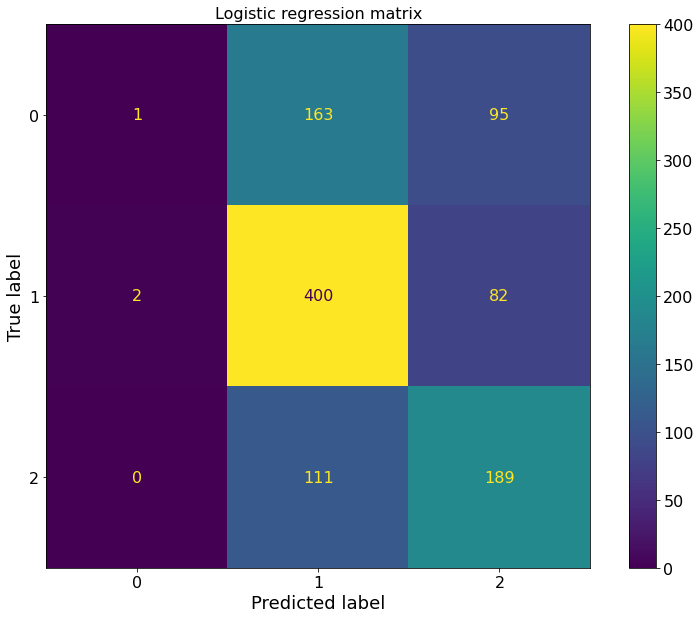

In [320]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(14, 10))
# Create the matrix
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test, preds)
cmp = ConfusionMatrixDisplay(cm, display_labels=grid_search.classes_)
ax.set_title('Logistic regression matrix',fontsize=16)
ax.set_xlabel('Predicted Label',fontsize=18)
ax.set_ylabel('True Label',fontsize=18)
#ax.tick_params(axis='both', which='major', labelsize=15) 
cmp.plot(ax=ax)

plt.show();

### Saving the model and Pipeline to use in the model deployment

In [328]:
# pickling the model
import pickle
pickle_out = open("model2.pkl", "wb")
pickle.dump(grid_search, pickle_out)
pickle_out.close()

In [329]:
pickle_out2 = open("pipeline2.pkl", "wb")
pickle.dump(preprocess_pipeline, pickle_out2)
pickle_out2.close()

# Testing the functions

In [323]:
#Assign values from the dataframe to the team name and retuen a dataframe with all team1 data
def assign_values_to_team1(team):
    
    if team in df_2.index :
        team1_data =  df_2.loc[team].reset_index()
        team1_data = team1_data.groupby('index').mean().reset_index().rename(columns={'index':'home_team.name'}).iloc[0]
        return team1_data

#Assign values from the dataframe to the team name and retuen a dataframe with all team2 data
def assign_values_to_team2(team):
    
    if team in df_3.index :
        team2_data =  df_3.loc[team].reset_index()
        team2_data = team2_data.groupby('index').mean().reset_index().rename(columns={'index':'away_team.name'}).iloc[0]
        return team2_data
    
#run the assign values functions and concat the resultiung 2 dataframes into one dataframe for the model input
def map_inputs_to_data(team1,team2):
    team_1 = assign_values_to_team1(team1)
    team_2 = assign_values_to_team2(team2)

    input_data = pd.concat([team_1,team_2])
    return input_data

In [326]:
#test the functions with input data
input_d = map_inputs_to_data('USA','South Korea')
input_processed = preprocess_pipeline.transform(pd.DataFrame(input_d).T)
input_processed

array([[ 5.37069917e+07, -4.65925564e+07, -3.08882645e+02,
        -6.72218953e+01, -4.32763532e+00, -1.11673503e+02,
         5.28982692e+00, -2.76889918e-01, -9.25836585e+00,
         3.79948884e+00, -3.94292854e+00, -2.00636919e+00,
         4.45184539e-02,  1.65153643e+00,  1.05659882e+00,
        -1.89741635e-01, -6.48835112e-02, -5.96913907e-01,
        -1.84506114e+00,  3.19802198e-01, -1.21173404e+00,
        -3.77698896e-01, -6.14922962e-01, -8.24581617e-01,
         2.69432518e-01,  2.37517424e-01, -1.50433690e-01,
        -3.78618593e-03,  9.06110738e-02,  1.66617215e-01,
        -1.09707004e-02, -6.43327833e-03, -2.37353961e-02,
        -3.31119160e-02, -2.05578662e-03,  1.14153913e-02,
        -6.46984419e-03,  9.55519086e-03, -9.41478971e-04,
         1.31718419e-04,  4.89168493e-04, -8.67573461e-05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [327]:
preds_test = grid_search.predict_proba(input_processed)
preds_test

array([[0.27400357, 0.56252394, 0.16347249]])

In [272]:
def predict_match_result(team1 ,team2):
    
    input_d = map_inputs_to_data(team1 , team2)
    input_processed = preprocess_pipeline.transform(pd.DataFrame(input_d).T)
    preds_test = model.predict_proba(input_processed)
    
    results_df = pd.DataFrame(columns=classes,data=np.round(preds_test,2))
    results_df.rename(columns={0:'Draw Probability',1:'{} wins Probability'.format(team1),2:'{} wins Probability'.format(team2)},inplace=True)
    return(results_df)
    
                     


## Predicting Match result (goal result)

In [374]:
#display the dataframe before dropping the scores columns
df

,date,tournament,home_team,home_score,home_team.Rank,home_team_Avg. age,home_team.Total value,home_team.Points,home_Pl,home_Age,...,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK,goal_difference,match_result
0,2010-03-03,AFC Asian Cup qualification,Iran,1,21,28.1,74380000.0,1573,15.500000,27.600000,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
1,2013-10-15,AFC Asian Cup qualification,Iran,2,21,28.1,74380000.0,1573,15.500000,27.600000,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
2,2013-03-17,Friendly,Qatar,1,52,26.7,14430000.0,1438,21.666667,26.633333,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
3,2010-12-07,AFF Championship,Indonesia,2,160,23.3,5280000.0,1002,25.500000,23.100000,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
4,2016-12-14,AFF Championship,Indonesia,2,160,23.3,5280000.0,1002,25.500000,23.100000,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,2011-11-14,FIFA World Cup qualification,Bermuda,2,166,26.2,2830000.0,982,14.000000,25.100000,...,0.5,5.5,0.0,0.50,0.00,0.5,0.25,0.25,1,1
5207,2017-10-28,Friendly,Bermuda,2,166,26.2,2830000.0,982,14.000000,25.100000,...,0.5,5.5,0.0,0.50,0.00,0.5,0.25,0.25,1,2
5208,2010-10-02,CFU Caribbean Cup qualification,Puerto Rico,3,172,23.5,1500000.0,963,16.000000,23.000000,...,0.0,2.0,0.0,0.00,0.00,0.0,0.00,0.00,2,1
5209,2011-07-15,Friendly,Fiji,1,162,25.3,2780000.0,996,15.000000,25.900000,...,0.0,3.0,0.0,1.00,0.00,1.0,1.00,1.00,1,2


In [375]:
#drop unnecessary columns and columns with many null values as poss columns
df_goals = df.drop(['goal_difference','match_result','date','home_Poss','away_Poss','tournament'],axis=1)
df_goals.head()

,home_team,home_score,home_team.Rank,home_team_Avg. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_MP,home_Starts,...,away_G-PK,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK
0,Iran,1,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,...,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5
1,Iran,2,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,...,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5
2,Qatar,1,52,26.7,14430000.0,1438,21.666667,26.633333,5.333333,58.666667,...,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5
3,Indonesia,2,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,...,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5
4,Indonesia,2,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,...,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5


In [376]:
#make a new columns with the final result from the home and away score columns
df_goals['match_goals_result'] = df_goals['home_score'].apply(str)  + '-' + df_goals['away_score'].apply(str)
df_goals.head()

,home_team,home_score,home_team.Rank,home_team_Avg. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_MP,home_Starts,...,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK,match_goals_result
0,Iran,1,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,...,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5,1-0
1,Iran,2,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,...,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5,2-1
2,Qatar,1,52,26.7,14430000.0,1438,21.666667,26.633333,5.333333,58.666667,...,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5,1-0
3,Indonesia,2,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,...,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5,2-1
4,Indonesia,2,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,...,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5,2-1


In [377]:
#checking the final results unique values
df_goals['match_goals_result'].unique()

array(['1-0', '2-1', '3-1', '1-2', '0-3', '2-0', '4-0', '1-1', '2-3',
       '3-2', '3-0', '2-2', '0-0', '0-1', '6-0', '0-2', '4-1', '1-3',
       '6-2', '3-3', '1-9', '1-6', '0-5', '0-4', '1-5', '1-4', '4-2',
       '6-1', '0-7', '5-0', '8-1', '10-0', '7-0', '0-6', '2-4', '4-3',
       '5-1', '2-6', '5-2', '8-0', '3-4', '0-8', '7-1', '5-3', '2-5',
       '4-4', '9-0', '1-7', '7-2', '3-5', '11-0'], dtype=object)

In [378]:
df_goals['match_goals_result'].value_counts().index

Index(['1-0', '1-1', '0-0', '2-0', '0-1', '2-1', '1-2', '0-2', '3-0', '2-2',
       '3-1', '4-0', '0-3', '1-3', '3-2', '2-3', '4-1', '5-0', '0-4', '1-4',
       '6-0', '4-2', '5-1', '3-3', '2-4', '0-5', '6-1', '0-6', '4-3', '3-4',
       '1-5', '5-2', '7-0', '8-0', '2-5', '5-3', '0-8', '8-1', '4-4', '7-1',
       '0-7', '1-7', '1-6', '6-2', '10-0', '9-0', '3-5', '7-2', '1-9', '2-6',
       '11-0'],
      dtype='object')

<AxesSubplot:>

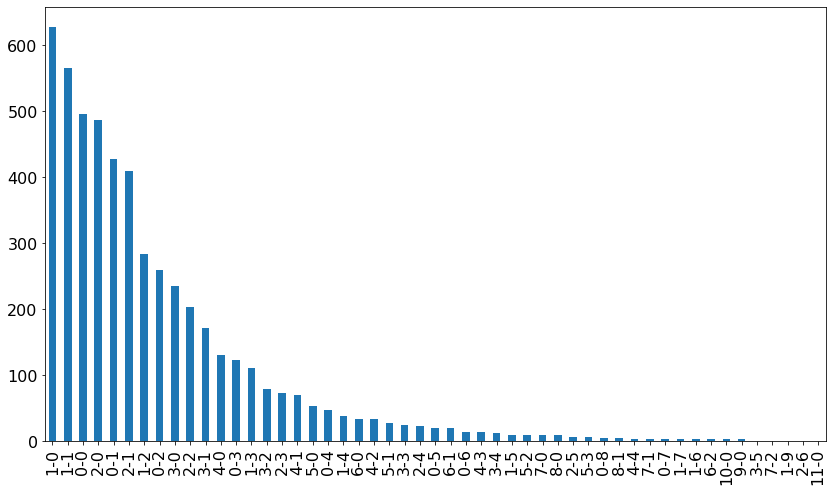

In [379]:
#checking the distribution of final result unique values
df_goals['match_goals_result'].value_counts().plot(kind='bar',figsize=(14,8))

There are many outliers that we should drop before training

In [380]:
#filter dataframe to exclude values with very low count values less than 10
df_goals = df_goals[df_goals['match_goals_result'].isin(['1-0', '1-1', '0-0', '2-0', '0-1', '2-1', '1-2', '0-2', '3-0', '2-2',
       '3-1', '4-0', '0-3', '1-3', '3-2', '2-3', '4-1', '5-0', '0-4', '1-4',
       '6-0', '4-2', '5-1', '3-3', '2-4', '0-5', '6-1', '0-6', '4-3', '3-4',
       '1-5'])]
df_goals['match_goals_result'].value_counts()

1-0    627
1-1    565
0-0    496
2-0    486
0-1    428
2-1    410
1-2    283
0-2    259
3-0    236
2-2    203
3-1    171
4-0    131
0-3    123
1-3    111
3-2     80
2-3     73
4-1     71
5-0     53
0-4     48
1-4     38
6-0     34
4-2     34
5-1     28
3-3     25
2-4     24
0-5     20
6-1     20
0-6     15
4-3     14
3-4     13
1-5     10
Name: match_goals_result, dtype: int64

In [381]:
#drop the scores columns
df_goals.drop(['home_score','away_score'],axis=1,inplace=True)

In [382]:
#rename the columns to be consistent with previous model data
df_goals.rename(columns={'home_team_Avg. age':'home_team. age'},inplace=True)
df_goals.rename(columns={'home_team':'home_team.name'},inplace=True)
df_goals.rename(columns={'away_team':'away_team.name'},inplace=True)

#split data to features and target
X_g = df_goals.drop('match_goals_result',axis=1)
y_g = df_goals['match_goals_result']

#building 2 lists for numerical and categorical columns for processing
categorical_cols = [col for col in X_g.columns if (X_g[col].dtype == 'object')]

numerical_cols = [col for col in X_g.columns if (X_g[col].dtype != 'object') ]

In [383]:
#preprocess the features data using the preprocess_pipeline function
X_g = preprocess_pipeline.fit_transform(X_g)

In [401]:
#splitting the data to 80% train and 20% test for features and target data
X_train_val2, X_test2, y_train_val2, y_test2 = train_test_split(X_g, y_g, test_size=0.20,random_state=42)

#make cross validation with hyperparameters tuning for best performance using grid search.
c_values = [300,10,0.1]
# define grid search
grid2 = dict(C=c_values)
model2 = LogisticRegression(max_iter=3000 )

grid_search2 = GridSearchCV(estimator=model2, param_grid=grid2, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)

#fitting the model on the train data
grid_search2.fit(X_train_val2 , y_train_val2)

GridSearchCV(cv=5, error_score=0, estimator=LogisticRegression(max_iter=3000),
             n_jobs=-1, param_grid={'C': [300, 10, 0.1]}, scoring='accuracy')

In [402]:
#predicting the probabilities of each class
predictions2 =grid_search2.predict_proba(X_test2)
preds2 = grid_search2.predict(X_test2)
np.round(predictions2,3)

array([[0.03 , 0.023, 0.024, ..., 0.03 , 0.031, 0.029],
       [0.043, 0.033, 0.038, ..., 0.029, 0.029, 0.027],
       [0.002, 0.001, 0.001, ..., 0.025, 0.038, 0.03 ],
       ...,
       [0.025, 0.023, 0.022, ..., 0.033, 0.035, 0.033],
       [0.044, 0.034, 0.04 , ..., 0.029, 0.028, 0.027],
       [0.042, 0.032, 0.037, ..., 0.029, 0.029, 0.028]])

In [404]:
grid_search2.classes_

array(['0-0', '0-1', '0-2', '0-3', '0-4', '0-5', '0-6', '1-0', '1-1',
       '1-2', '1-3', '1-4', '1-5', '2-0', '2-1', '2-2', '2-3', '2-4',
       '3-0', '3-1', '3-2', '3-3', '3-4', '4-0', '4-1', '4-2', '4-3',
       '5-0', '5-1', '6-0', '6-1'], dtype=object)

In [406]:
#building a dataframe for each class probablility
pd.set_option('display.max_columns', 500)
results_df2 = pd.DataFrame(columns=grid_search2.classes_,data=np.round(predictions2,3))
results_df2

,0-0,0-1,0-2,0-3,0-4,0-5,0-6,1-0,1-1,1-2,1-3,1-4,1-5,2-0,2-1,2-2,2-3,2-4,3-0,3-1,3-2,3-3,3-4,4-0,4-1,4-2,4-3,5-0,5-1,6-0,6-1
0,0.030,0.023,0.024,0.024,0.024,0.026,0.027,0.079,0.031,0.024,0.023,0.026,0.026,0.073,0.038,0.025,0.024,0.027,0.051,0.040,0.027,0.026,0.028,0.041,0.032,0.028,0.028,0.035,0.030,0.031,0.029
1,0.043,0.033,0.038,0.032,0.028,0.028,0.029,0.065,0.032,0.034,0.029,0.029,0.027,0.057,0.031,0.025,0.025,0.028,0.041,0.034,0.027,0.027,0.028,0.035,0.029,0.027,0.027,0.030,0.029,0.029,0.027
2,0.002,0.001,0.001,0.002,0.007,0.009,0.012,0.112,0.014,0.002,0.004,0.009,0.014,0.145,0.096,0.017,0.012,0.012,0.114,0.060,0.018,0.015,0.019,0.072,0.045,0.021,0.020,0.052,0.025,0.038,0.030
3,0.022,0.017,0.016,0.019,0.022,0.024,0.026,0.084,0.029,0.018,0.020,0.024,0.026,0.080,0.045,0.025,0.023,0.026,0.058,0.043,0.028,0.026,0.028,0.046,0.035,0.028,0.028,0.038,0.031,0.034,0.031
4,0.041,0.031,0.036,0.031,0.027,0.028,0.028,0.066,0.032,0.032,0.028,0.028,0.027,0.059,0.032,0.025,0.025,0.028,0.042,0.035,0.028,0.027,0.028,0.035,0.029,0.027,0.027,0.031,0.029,0.029,0.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,0.049,0.076,0.085,0.059,0.045,0.037,0.032,0.004,0.027,0.064,0.053,0.037,0.032,0.005,0.012,0.034,0.038,0.033,0.008,0.013,0.029,0.032,0.028,0.012,0.018,0.028,0.028,0.016,0.024,0.020,0.023
1022,0.049,0.046,0.054,0.042,0.035,0.033,0.032,0.029,0.032,0.045,0.038,0.033,0.031,0.027,0.024,0.029,0.031,0.032,0.025,0.026,0.030,0.030,0.030,0.026,0.026,0.029,0.029,0.026,0.029,0.027,0.027
1023,0.025,0.023,0.022,0.025,0.027,0.029,0.030,0.051,0.031,0.024,0.026,0.029,0.030,0.051,0.040,0.030,0.029,0.030,0.045,0.039,0.031,0.030,0.031,0.040,0.035,0.031,0.031,0.037,0.033,0.035,0.033
1024,0.044,0.034,0.040,0.033,0.029,0.029,0.029,0.059,0.032,0.035,0.030,0.029,0.028,0.052,0.030,0.025,0.026,0.029,0.038,0.033,0.028,0.028,0.028,0.033,0.028,0.027,0.028,0.030,0.029,0.028,0.027


In [407]:
#find the overall score
accuracy_score(y_test2,preds2)

0.1189083820662768

In [408]:
#print the classification report to get the precision and recall and f1-score
print(classification_report(y_test2, preds2))

              precision    recall  f1-score   support

         0-0       0.20      0.02      0.04        94
         0-1       0.17      0.07      0.10        96
         0-2       0.10      0.41      0.16        54
         0-3       0.00      0.00      0.00        20
         0-4       0.00      0.00      0.00        11
         0-5       0.00      0.00      0.00         3
         0-6       0.00      0.00      0.00         2
         1-0       0.12      0.67      0.21       111
         1-1       0.00      0.00      0.00       112
         1-2       0.00      0.00      0.00        74
         1-3       0.00      0.00      0.00        20
         1-4       0.00      0.00      0.00        11
         1-5       0.00      0.00      0.00         2
         2-0       0.16      0.16      0.16        93
         2-1       0.03      0.01      0.02        84
         2-2       0.04      0.02      0.03        45
         2-3       0.00      0.00      0.00        11
         2-4       0.00    

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

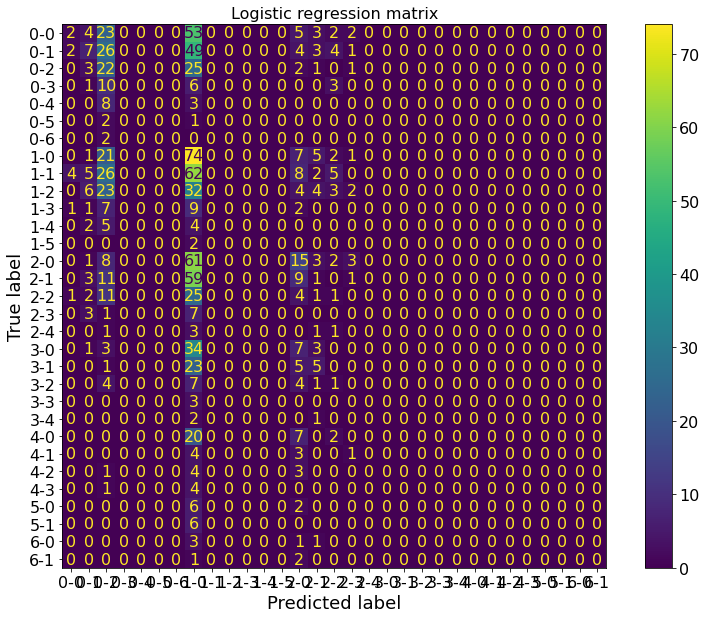

In [410]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(14, 10))
# Create the matrix
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test2, preds2)
cmp = ConfusionMatrixDisplay(cm, display_labels=grid_search2.classes_)
ax.set_title('Logistic regression matrix',fontsize=16)
ax.set_xlabel('Predicted Label',fontsize=18)
ax.set_ylabel('True Label',fontsize=18)
#ax.tick_params(axis='both', which='major', labelsize=15) 
cmp.plot(ax=ax)

plt.show();

#### Testing the model with test input data

In [441]:
input_d = map_inputs_to_data('Cameroon','Algeria')
input_processed = preprocess_pipeline.transform(pd.DataFrame(input_d).T)
grid_search2.predict_proba(input_processed)



array([[0.03525702, 0.03595051, 0.03691513, 0.03498882, 0.03360939,
        0.03303009, 0.03262249, 0.02871666, 0.03228485, 0.03547735,
        0.03430317, 0.03303538, 0.03250061, 0.02851883, 0.02969264,
        0.03237057, 0.03278089, 0.0326398 , 0.02917418, 0.03021369,
        0.03209845, 0.03243353, 0.03206918, 0.02995527, 0.03079995,
        0.03193217, 0.03201509, 0.03054302, 0.03162915, 0.03103939,
        0.03140275]])

In [442]:
df5 = pd.DataFrame(columns=grid_search2.classes_,data=np.round(grid_search2.predict_proba(input_processed),3))

In [446]:
df5

,0-0,0-1,0-2,0-3,0-4,0-5,0-6,1-0,1-1,1-2,1-3,1-4,1-5,2-0,2-1,2-2,2-3,2-4,3-0,3-1,3-2,3-3,3-4,4-0,4-1,4-2,4-3,5-0,5-1,6-0,6-1
0,0.035,0.036,0.037,0.035,0.034,0.033,0.033,0.029,0.032,0.035,0.034,0.033,0.033,0.029,0.03,0.032,0.033,0.033,0.029,0.03,0.032,0.032,0.032,0.03,0.031,0.032,0.032,0.031,0.032,0.031,0.031


In [454]:
int(df5.columns[0][2])

0

In [464]:
# dataframe of Draws
df5[[x for x in df5.columns if (int(x[0]) == int(x[2]))]]

,0-0,1-1,2-2,3-3
0,0.035,0.032,0.032,0.032


In [463]:
# dataframe of home wins
df5[[x for x in df5.columns if (int(x[0]) > int(x[2]))]]

,1-0,2-0,2-1,3-0,3-1,3-2,4-0,4-1,4-2,4-3,5-0,5-1,6-0,6-1
0,0.029,0.029,0.03,0.029,0.03,0.032,0.03,0.031,0.032,0.032,0.031,0.032,0.031,0.031


In [462]:
#dataframe of away wins
df5[[x for x in df5.columns if (int(x[0]) < int(x[2]))]]

,0-1,0-2,0-3,0-4,0-5,0-6,1-2,1-3,1-4,1-5,2-3,2-4,3-4
0,0.036,0.037,0.035,0.034,0.033,0.033,0.035,0.034,0.033,0.033,0.033,0.033,0.032


In [443]:
len(grid_search2.classes_)

31

In [444]:
df5.loc[0].nlargest(5).values.sum()

0.17800000000000002

In [428]:
# pickling the model to use for deployment
pickle_out = open("model_goals.pkl", "wb")
pickle.dump(grid_search2, pickle_out)
pickle_out.close()